In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from surprise import Reader, Dataset
from scipy.stats.stats import pearsonr
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from keras.models import Sequential
from keras.layers import Dense, Activation
# https://www.kaggle.com/code/fuzzywizard/rec-sys-collaborative-filtering-dl-techniques

C:\Users\system 4\AppData\Local\Temp\ipykernel_3100\3967113692.py:6: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [2]:
%cd Z:\PPMI_Data\Excels\CollaborativeFiltering
df = pd.read_csv('Feats45_unCateg_APPRDX.csv')
df.shape
df.head(2)

Z:\PPMI_Data\Excels\CollaborativeFiltering


,PATNO,APPRDX,Patient_ID,Anxiety,Apathy,Benton,Clock,Cognition,COGSTATE,Constipate,...,Semantic,SleepDay,SleepNight,STAIA,STAIS,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT,Urine
0,3002,1,1,1,0,12.16,7,1,1,1,...,57,1,0,45,59,47.5,110,204,17,1
1,3010,1,2,1,1,7.76,6,1,1,0,...,36,1,3,40,39,52.0,27,52,9,0


In [3]:
# Removing a column
df1 = df.drop(['PATNO', 'Patient_ID'], axis = 1)
df1.head(2)

,APPRDX,Anxiety,Apathy,Benton,Clock,Cognition,COGSTATE,Constipate,Depress,DopaDefic,...,Semantic,SleepDay,SleepNight,STAIA,STAIS,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT,Urine
0,1,1,0,12.16,7,1,1,1,1,0,...,57,1,0,45,59,47.5,110,204,17,1
1,1,1,1,7.76,6,1,1,0,0,0,...,36,1,3,40,39,52.0,27,52,9,0


In [4]:
# scaling values of every column from 1 to 5 [column wise]
scaler = MinMaxScaler (feature_range = (1,5))
df_scaled = scaler.fit_transform(df1)
df_scaled = pd.DataFrame (df_scaled, columns = df1.columns)
df_scaled.head(2)

,APPRDX,Anxiety,Apathy,Benton,Clock,Cognition,COGSTATE,Constipate,Depress,DopaDefic,...,Semantic,SleepDay,SleepNight,STAIA,STAIS,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT,Urine
0,1.0,2.333333,1.0,3.503546,5.000000,3.0,1.0,2.333333,2.0,1.0,...,3.285714,3.0,1.0,3.434783,5.0,2.833333,3.832117,3.686131,2.333333,2.0
1,1.0,2.333333,3.0,1.943262,4.333333,3.0,1.0,1.000000,1.0,1.0,...,1.785714,3.0,4.0,2.565217,3.0,3.133333,1.408759,1.467153,1.363636,1.0


In [5]:
X = df_scaled.iloc[:, 1:].values
y = df_scaled.iloc[:, 0].values

In [6]:
 
### Sandardization of data ###
### We does not standardize the Target variable for classification
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

# Quick sanity check with the shapes of Training and Testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(200, 45)
(200,)
(50, 45)
(50,)


In [7]:
classifier = Sequential()
# Defining the Input layer and FIRST hidden layer,both are same!
# relu means Rectifier linear unit function
classifier.add(Dense(units=10, input_dim=45, kernel_initializer='uniform', activation='relu'))

#Defining the SECOND hidden layer, here we have not defined input because it is
# second layer and it will get input as the output of first hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Defining the Output layer
# sigmoid means sigmoid activation function
# for Multiclass classification the activation ='softmax'
# And output_dim will be equal to the number of factor levels
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Optimizer== the algorithm of SGG to keep updating weights
# loss== the loss function to measure the accuracy
# metrics== the way we will compare the accuracy after each step of SGD
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fitting the Neural Network on the training data
survivalANN_Model=classifier.fit(X_train,y_train, batch_size=10 , epochs=10, verbose=1)

# fitting the Neural Network on the training data
survivalANN_Model=classifier.fit(X_train,y_train, batch_size=10 , epochs=10, verbose=1)

Epoch 1/10
20/20 [==============================] - 0s 823us/step - loss: 0.6759 - accuracy: 0.6250
Epoch 2/10
20/20 [==============================] - 0s 822us/step - loss: 0.6316 - accuracy: 0.6650
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 0.5645 - accuracy: 0.6650
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4312 - accuracy: 0.6650
Epoch 5/10
20/20 [==============================] - 0s 822us/step - loss: 0.1856 - accuracy: 0.6650
Epoch 6/10
20/20 [==============================] - 0s 822us/step - loss: -0.3173 - accuracy: 0.6650
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: -1.0775 - accuracy: 0.6650
Epoch 8/10
20/20 [==============================] - 0s 823us/step - loss: -2.3223 - accuracy: 0.6650
Epoch 9/10
20/20 [==============================] - 0s 822us/step - loss: -3.9099 - accuracy: 0.6650
Epoch 10/10
20/20 [==============================] - 0s 2ms/step - loss: -6.1241 - accuracy: 0.6650
Ep

In [8]:
# Defining a function for finding best hyperparameters
def FunctionFindBestParams(X_train, y_train):
    
    # Defining the list of hyper parameters to try
    TrialNumber=0
    batch_size_list=[5, 10, 15, 20]
    epoch_list=[5, 10, 50 ,100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            
            # Creating the classifier ANN model
            classifier = Sequential()
            classifier.add(Dense(units=10, input_dim=45, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
            classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

            
            survivalANN_Model=classifier.fit(X_train,y_train, batch_size=batch_size_trial , epochs=epochs_trial, verbose=0)
            # Fetching the accuracy of the training
            Accuracy = survivalANN_Model.history['accuracy'][-1]
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', Accuracy)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
                            'batch_size'+str(batch_size_trial)+'-'+'epoch'+str(epochs_trial), Accuracy]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)

###############################################

# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 0.6650000214576721


C:\Users\system 4\AppData\Local\Temp\ipykernel_3100\3203288683.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 0.6650000214576721


C:\Users\system 4\AppData\Local\Temp\ipykernel_3100\3203288683.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 0.6650000214576721


C:\Users\system 4\AppData\Local\Temp\ipykernel_3100\3203288683.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 0.6650000214576721


C:\Users\system 4\AppData\Local\Temp\ipykernel_3100\3203288683.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 0.6650000214576721


C:\Users\system 4\AppData\Local\Temp\ipykernel_3100\3203288683.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 0.6650000214576721


C:\Users\system 4\AppData\Local\Temp\ipykernel_3100\3203288683.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 0.6650000214576721


C:\Users\system 4\AppData\Local\Temp\ipykernel_3100\3203288683.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 0.6650000214576721


C:\Users\system 4\AppData\Local\Temp\ipykernel_3100\3203288683.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 0.6650000214576721


C:\Users\system 4\AppData\Local\Temp\ipykernel_3100\3203288683.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 0.6650000214576721


C:\Users\system 4\AppData\Local\Temp\ipykernel_3100\3203288683.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 0.6650000214576721


C:\Users\system 4\AppData\Local\Temp\ipykernel_3100\3203288683.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 0.6650000214576721


C:\Users\system 4\AppData\Local\Temp\ipykernel_3100\3203288683.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 0.6650000214576721


C:\Users\system 4\AppData\Local\Temp\ipykernel_3100\3203288683.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 0.6650000214576721


C:\Users\system 4\AppData\Local\Temp\ipykernel_3100\3203288683.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


15 Parameters: batch_size: 20 - epochs: 50 Accuracy: 0.6650000214576721


C:\Users\system 4\AppData\Local\Temp\ipykernel_3100\3203288683.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


16 Parameters: batch_size: 20 - epochs: 100 Accuracy: 0.6650000214576721


C:\Users\system 4\AppData\Local\Temp\ipykernel_3100\3203288683.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


  TrialNumber          Parameters  Accuracy
0           1  batch_size5-epoch5     0.665


<AxesSubplot: xlabel='Parameters'>

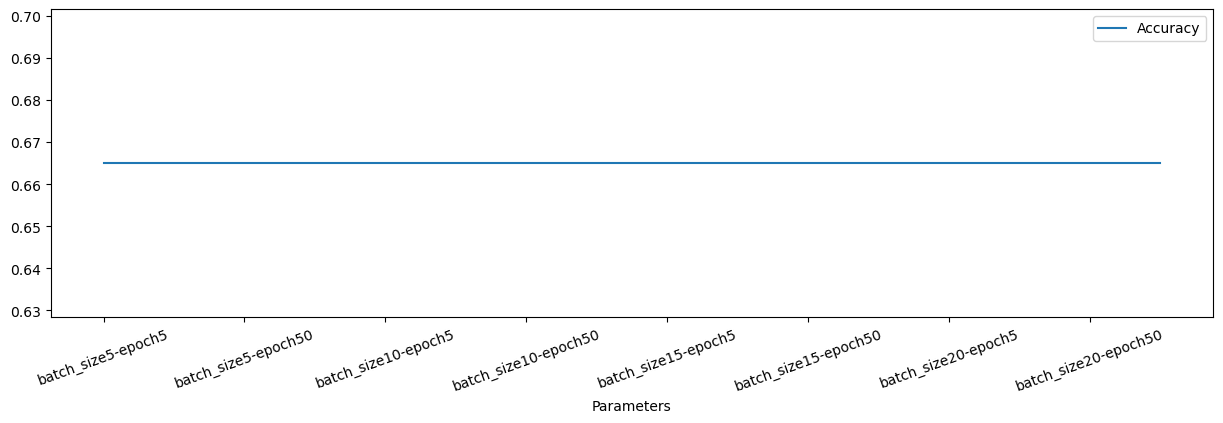

In [9]:
# Printing the best parameter
print(ResultsData.sort_values(by='Accuracy', ascending=False).head(1))

# Visualizing the results
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line', rot=20)

In [10]:
# Training the model with best hyperparamters
classifier.fit(X_train,y_train, batch_size=5 , epochs=100, verbose=1)

Epoch 1/100
40/40 [==============================] - 0s 2ms/step - loss: -93.4846 - accuracy: 0.6650
Epoch 2/100
40/40 [==============================] - 0s 1ms/step - loss: -126.0644 - accuracy: 0.6650
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: -164.3511 - accuracy: 0.6650
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: -207.8475 - accuracy: 0.6650
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: -258.9012 - accuracy: 0.6650
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: -316.2840 - accuracy: 0.6650
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: -380.2640 - accuracy: 0.6650
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: -454.6409 - accuracy: 0.6650
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: -535.2659 - accuracy: 0.6650
Epoch 10/100
40/40 [==============================] - 0s 3ms/step - loss: -627.5786

40/40 [==============================] - 0s 1ms/step - loss: -38679.2969 - accuracy: 0.6650
Epoch 80/100
40/40 [==============================] - 0s 1ms/step - loss: -39793.2656 - accuracy: 0.6650
Epoch 81/100
40/40 [==============================] - 0s 968us/step - loss: -40900.2422 - accuracy: 0.6650
Epoch 82/100
40/40 [==============================] - 0s 1ms/step - loss: -42036.8438 - accuracy: 0.6650
Epoch 83/100
40/40 [==============================] - 0s 1ms/step - loss: -43179.9453 - accuracy: 0.6650
Epoch 84/100
40/40 [==============================] - 0s 1ms/step - loss: -44370.9805 - accuracy: 0.6650
Epoch 85/100
40/40 [==============================] - 0s 1ms/step - loss: -45557.0938 - accuracy: 0.6650
Epoch 86/100
40/40 [==============================] - 0s 1ms/step - loss: -46750.8594 - accuracy: 0.6650
Epoch 87/100
40/40 [==============================] - 0s 1ms/step - loss: -47977.3086 - accuracy: 0.6650
Epoch 88/100
40/40 [==============================] - 0s 2ms/step 

In [12]:
# Predictions on testing data
Predictions=classifier.predict(X_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

# Generating a data frame for analyzing the test data
TestingData=pd.DataFrame(data=Test_Data)

2/2 [==============================] - 0s 0s/step


In [14]:
# Generating a data frame for analyzing the test data
TestingData['Survival']=y_test
TestingData['PredictedSurvivalProb']=Predictions

# Defining the probability threshold
def probThreshold(inpProb):
    if inpProb  >  0.5:
        return(1)
    else:
        return(0)

# Generating predictions on the testing data by applying probability threshold
TestingData['PredictedSurvival']=TestingData['PredictedSurvivalProb'].apply(probThreshold)
print(TestingData.head())

###############################################
from sklearn import metrics
print('\n######### Testing Accuracy Results #########')
print(metrics.classification_report(TestingData['Survival'], TestingData['PredictedSurvival']))
print(metrics.confusion_matrix(TestingData['Survival'], TestingData['PredictedSurvival']))

          0    1         2         3    4    5         6    7    8         9  \
0  2.333333  1.0  3.893617  4.333333  1.0  1.0  1.000000  1.0  1.0  2.777778   
1  1.000000  1.0  3.113475  5.000000  1.0  1.0  1.000000  2.0  1.0  2.777778   
2  5.000000  1.0  3.439716  5.000000  3.0  1.0  1.000000  5.0  1.0  1.888889   
3  1.000000  1.0  2.106383  3.666667  1.0  5.0  2.333333  1.0  1.0  2.333333   
4  3.666667  1.0  4.673759  5.000000  1.0  1.0  1.000000  2.0  1.0  2.777778   

   ...        38   39        40        41        42        43   44  Survival  \
0  ...  3.260870  4.2  1.250000  2.576642  2.941606  3.303030  2.0       1.0   
1  ...  3.260870  3.6  3.000000  1.496350  1.875912  4.878788  1.0       5.0   
2  ...  3.956522  3.7  3.583333  1.934307  2.299270  4.393939  4.0       5.0   
3  ...  4.478261  3.4  2.388667  3.481752  3.394161  1.242424  1.0       1.0   
4  ...  2.217391  3.0  2.933333  1.583942  1.715328  4.151515  1.0       1.0   

   PredictedSurvivalProb  PredictedSur

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
# Function to generate Deep ANN model 
def make_classification_ann(Optimizer_Trial, Neurons_Trial):
    from keras.models import Sequential
    from keras.layers import Dense
    
    # Creating the classifier ANN model
    classifier = Sequential()
    classifier.add(Dense(units=Neurons_Trial, input_dim=45, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=Neurons_Trial, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer=Optimizer_Trial, loss='binary_crossentropy', metrics=['accuracy'])
            
    return classifier

########################################

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier


Parameter_Trials={'batch_size':[10,20,30],
                      'epochs':[10,20],
                    'Optimizer_Trial':['adam', 'rmsprop'],
                  'Neurons_Trial': [5,10]
                 }

# Creating the classifier ANN
classifierModel=KerasClassifier(make_classification_ann, verbose=0)

########################################

# Creating the Grid search space
# See different scoring methods by using sklearn.metrics.SCORERS.keys()
grid_search=GridSearchCV(estimator=classifierModel, param_grid=Parameter_Trials, scoring='f1', cv=5)

########################################

# Measuring how much time it took to find the best params
import time
StartTime=time.time()

# Running Grid Search for different paramenters
grid_search.fit(X_train,y_train, verbose=1)

EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

########################################

# printing the best parameters
print('\n#### Best hyperparamters ####')
grid_search.best_params_

Epoch 1/10


C:\Users\system 4\AppData\Local\Temp\ipykernel_3100\1540973042.py:28: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifierModel=KerasClassifier(make_classification_ann, verbose=0)


16/16 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.6625
Epoch 2/10
16/16 [==============================] - 0s 1ms/step - loss: 0.6890 - accuracy: 0.6750
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.6750
Epoch 4/10
16/16 [==============================] - 0s 1ms/step - loss: 0.6802 - accuracy: 0.6750
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.6750
Epoch 6/10
16/16 [==============================] - 0s 1ms/step - loss: 0.6579 - accuracy: 0.6750
Epoch 7/10
16/16 [==============================] - 0s 1ms/step - loss: 0.6361 - accuracy: 0.6750
Epoch 8/10
16/16 [==============================] - 0s 1ms/step - loss: 0.6078 - accuracy: 0.6750
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 0.5746 - accuracy: 0.6750
Epoch 10/10
2/2 [==============================] - 0s 0s/step
Epoch 1/10
16/16 [==============================] - 0s 2ms/step - l

16/16 [==============================] - 0s 1ms/step - loss: 0.4262 - accuracy: 0.8188
Epoch 18/20
16/16 [==============================] - 0s 1ms/step - loss: 0.4133 - accuracy: 0.8313
Epoch 19/20
16/16 [==============================] - 0s 1ms/step - loss: 0.4012 - accuracy: 0.8500
Epoch 20/20
2/2 [==============================] - 0s 16ms/step
Epoch 1/20
16/16 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.6500
Epoch 2/20
16/16 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.6750
Epoch 3/20
16/16 [==============================] - 0s 1ms/step - loss: 0.6861 - accuracy: 0.6750
Epoch 4/20
16/16 [==============================] - 0s 434us/step - loss: 0.6816 - accuracy: 0.6750
Epoch 5/20
16/16 [==============================] - 0s 1ms/step - loss: 0.6749 - accuracy: 0.6750
Epoch 6/20
16/16 [==============================] - 0s 2ms/step - loss: 0.6642 - accuracy: 0.6750
Epoch 7/20
16/16 [==============================] - 0s 1ms/st

16/16 [==============================] - 0s 2ms/step - loss: 0.5447 - accuracy: 0.8687
Epoch 19/20
16/16 [==============================] - 0s 1ms/step - loss: 0.5355 - accuracy: 0.8750
Epoch 20/20
2/2 [==============================] - 0s 0s/step
Epoch 1/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.6750
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.6750
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.6750
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.6750
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.6750
Epoch 6/10
8/8 [==============================] - 0s 0s/step - loss: 0.6822 - accuracy: 0.6750
Epoch 7/10
8/8 [==============================] - 0s 0s/step - loss: 0.6784 - accuracy: 0.6750
Epoch 8/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6734 - acc

8/8 [==============================] - 0s 2ms/step - loss: 0.6763 - accuracy: 0.6750
Epoch 10/20
8/8 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.6750
Epoch 11/20
8/8 [==============================] - 0s 2ms/step - loss: 0.6669 - accuracy: 0.6750
Epoch 12/20
8/8 [==============================] - 0s 2ms/step - loss: 0.6610 - accuracy: 0.6750
Epoch 13/20
8/8 [==============================] - 0s 0s/step - loss: 0.6543 - accuracy: 0.6750
Epoch 14/20
8/8 [==============================] - 0s 930us/step - loss: 0.6460 - accuracy: 0.7063
Epoch 15/20
8/8 [==============================] - 0s 2ms/step - loss: 0.6367 - accuracy: 0.7437
Epoch 16/20
8/8 [==============================] - 0s 2ms/step - loss: 0.6263 - accuracy: 0.7875
Epoch 17/20
8/8 [==============================] - 0s 2ms/step - loss: 0.6150 - accuracy: 0.8000
Epoch 18/20
8/8 [==============================] - 0s 0s/step - loss: 0.6026 - accuracy: 0.8250
Epoch 19/20
8/8 [=========================

6/6 [==============================] - 1s 0s/step - loss: 0.6926 - accuracy: 0.7063
Epoch 2/10
6/6 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.6750
Epoch 3/10
6/6 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.6750
Epoch 4/10
6/6 [==============================] - 0s 0s/step - loss: 0.6880 - accuracy: 0.6750
Epoch 5/10
6/6 [==============================] - 0s 0s/step - loss: 0.6858 - accuracy: 0.6750
Epoch 6/10
6/6 [==============================] - 0s 3ms/step - loss: 0.6830 - accuracy: 0.6750
Epoch 7/10
6/6 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.6750
Epoch 8/10
6/6 [==============================] - 0s 0s/step - loss: 0.6755 - accuracy: 0.6750
Epoch 9/10
6/6 [==============================] - 0s 0s/step - loss: 0.6703 - accuracy: 0.6750
Epoch 10/10
2/2 [==============================] - 0s 0s/step
Epoch 1/10
6/6 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0

6/6 [==============================] - 0s 0s/step - loss: 0.6898 - accuracy: 0.6812
Epoch 4/20
6/6 [==============================] - 0s 0s/step - loss: 0.6882 - accuracy: 0.6812
Epoch 5/20
6/6 [==============================] - 0s 0s/step - loss: 0.6864 - accuracy: 0.6812
Epoch 6/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6841 - accuracy: 0.6812
Epoch 7/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6814 - accuracy: 0.6812
Epoch 8/20
6/6 [==============================] - 0s 1ms/step - loss: 0.6781 - accuracy: 0.6812
Epoch 9/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6743 - accuracy: 0.6812
Epoch 10/20
6/6 [==============================] - 0s 0s/step - loss: 0.6693 - accuracy: 0.6812
Epoch 11/20
6/6 [==============================] - 0s 0s/step - loss: 0.6632 - accuracy: 0.6812
Epoch 12/20
6/6 [==============================] - 0s 0s/step - loss: 0.6565 - accuracy: 0.6812
Epoch 13/20
6/6 [==============================] - 0s 

16/16 [==============================] - 0s 1ms/step - loss: 0.6724 - accuracy: 0.6812
Epoch 6/10
16/16 [==============================] - 0s 0s/step - loss: 0.6632 - accuracy: 0.6812
Epoch 7/10
16/16 [==============================] - 0s 1ms/step - loss: 0.6526 - accuracy: 0.6812
Epoch 8/10
16/16 [==============================] - 0s 1ms/step - loss: 0.6407 - accuracy: 0.6812
Epoch 9/10
16/16 [==============================] - 0s 1ms/step - loss: 0.6267 - accuracy: 0.6812
Epoch 10/10
2/2 [==============================] - 0s 16ms/step
Epoch 1/10
16/16 [==============================] - 0s 434us/step - loss: 0.6925 - accuracy: 0.5938
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.6562
Epoch 3/10
16/16 [==============================] - 0s 1ms/step - loss: 0.6872 - accuracy: 0.6562
Epoch 4/10
16/16 [==============================] - 0s 1ms/step - loss: 0.6838 - accuracy: 0.6562
Epoch 5/10
16/16 [==============================] - 0s 2ms/step 

16/16 [==============================] - 0s 1ms/step - loss: 0.5650 - accuracy: 0.7937
Epoch 16/20
16/16 [==============================] - 0s 1ms/step - loss: 0.5485 - accuracy: 0.8438
Epoch 17/20
16/16 [==============================] - 0s 1ms/step - loss: 0.5318 - accuracy: 0.8562
Epoch 18/20
16/16 [==============================] - 0s 1ms/step - loss: 0.5154 - accuracy: 0.8687
Epoch 19/20
16/16 [==============================] - 0s 434us/step - loss: 0.4980 - accuracy: 0.8750
Epoch 20/20
2/2 [==============================] - 0s 7ms/step
Epoch 1/20
16/16 [==============================] - 0s 436us/step - loss: 0.6907 - accuracy: 0.6562
Epoch 2/20
16/16 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.6562
Epoch 3/20
16/16 [==============================] - 0s 1ms/step - loss: 0.6802 - accuracy: 0.6562
Epoch 4/20
16/16 [==============================] - 0s 1ms/step - loss: 0.6715 - accuracy: 0.6562
Epoch 5/20
16/16 [==============================] - 0s 1ms

8/8 [==============================] - 0s 929us/step - loss: 0.6703 - accuracy: 0.6562
Epoch 7/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6625 - accuracy: 0.6562
Epoch 8/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6537 - accuracy: 0.6562
Epoch 9/10
8/8 [==============================] - 0s 0s/step - loss: 0.6437 - accuracy: 0.6562
Epoch 10/10
2/2 [==============================] - 0s 0s/step
Epoch 1/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.6313
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.6375
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.6375
Epoch 4/10
8/8 [==============================] - 0s 0s/step - loss: 0.6854 - accuracy: 0.6375
Epoch 5/10
8/8 [==============================] - 0s 0s/step - loss: 0.6816 - accuracy: 0.6375
Epoch 6/10
8/8 [==============================] - 0s 930us/step - loss: 0.6770 - accur

8/8 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.6562
Epoch 9/20
8/8 [==============================] - 0s 0s/step - loss: 0.6589 - accuracy: 0.6562
Epoch 10/20
8/8 [==============================] - 0s 2ms/step - loss: 0.6523 - accuracy: 0.6562
Epoch 11/20
8/8 [==============================] - 0s 2ms/step - loss: 0.6447 - accuracy: 0.6562
Epoch 12/20
8/8 [==============================] - 0s 2ms/step - loss: 0.6365 - accuracy: 0.6562
Epoch 13/20
8/8 [==============================] - 0s 2ms/step - loss: 0.6277 - accuracy: 0.6562
Epoch 14/20
8/8 [==============================] - 0s 0s/step - loss: 0.6188 - accuracy: 0.6562
Epoch 15/20
8/8 [==============================] - 0s 0s/step - loss: 0.6096 - accuracy: 0.6562
Epoch 16/20
8/8 [==============================] - 0s 3ms/step - loss: 0.6000 - accuracy: 0.6562
Epoch 17/20
8/8 [==============================] - 0s 2ms/step - loss: 0.5903 - accuracy: 0.6562
Epoch 18/20
8/8 [=============================

2/2 [==============================] - 0s 0s/step
Epoch 1/20
6/6 [==============================] - 1s 0s/step - loss: 0.6922 - accuracy: 0.6750
Epoch 2/20
6/6 [==============================] - 0s 0s/step - loss: 0.6899 - accuracy: 0.6750
Epoch 3/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.6750
Epoch 4/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.6750
Epoch 5/20
6/6 [==============================] - 0s 0s/step - loss: 0.6825 - accuracy: 0.6750
Epoch 6/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6791 - accuracy: 0.6750
Epoch 7/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6751 - accuracy: 0.6750
Epoch 8/20
6/6 [==============================] - 0s 0s/step - loss: 0.6707 - accuracy: 0.6750
Epoch 9/20
6/6 [==============================] - 0s 0s/step - loss: 0.6656 - accuracy: 0.6750
Epoch 10/20
6/6 [==============================] - 0s 0s/step - loss: 0.6603 - accuracy: 0.

6/6 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.6375
Epoch 3/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.6375
Epoch 4/20
6/6 [==============================] - 0s 0s/step - loss: 0.6895 - accuracy: 0.6375
Epoch 5/20
6/6 [==============================] - 0s 0s/step - loss: 0.6881 - accuracy: 0.6375
Epoch 6/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.6375
Epoch 7/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.6375
Epoch 8/20
6/6 [==============================] - 0s 0s/step - loss: 0.6834 - accuracy: 0.6375
Epoch 9/20
6/6 [==============================] - 0s 0s/step - loss: 0.6815 - accuracy: 0.6375
Epoch 10/20
6/6 [==============================] - 0s 4ms/step - loss: 0.6796 - accuracy: 0.6375
Epoch 11/20
6/6 [==============================] - 0s 0s/step - loss: 0.6773 - accuracy: 0.6438
Epoch 12/20
6/6 [==============================] - 0s 

16/16 [==============================] - 0s 1ms/step - loss: 0.4262 - accuracy: 0.6812
Epoch 13/20
16/16 [==============================] - 0s 1ms/step - loss: 0.4037 - accuracy: 0.7750
Epoch 14/20
16/16 [==============================] - 0s 1ms/step - loss: 0.3805 - accuracy: 0.8625
Epoch 15/20
16/16 [==============================] - 0s 1ms/step - loss: 0.3561 - accuracy: 0.8813
Epoch 16/20
16/16 [==============================] - 0s 1ms/step - loss: 0.3307 - accuracy: 0.8938
Epoch 17/20
16/16 [==============================] - 0s 1ms/step - loss: 0.3054 - accuracy: 0.9125
Epoch 18/20
16/16 [==============================] - 0s 1ms/step - loss: 0.2799 - accuracy: 0.9187
Epoch 19/20
16/16 [==============================] - 0s 1ms/step - loss: 0.2577 - accuracy: 0.9250
Epoch 20/20
2/2 [==============================] - 0s 0s/step
Epoch 1/20
16/16 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.6625
Epoch 2/20
16/16 [==============================] - 0s 1ms/s

16/16 [==============================] - 0s 1ms/step - loss: 0.3572 - accuracy: 0.8625
Epoch 14/20
16/16 [==============================] - 0s 434us/step - loss: 0.3340 - accuracy: 0.8687
Epoch 15/20
16/16 [==============================] - 0s 1ms/step - loss: 0.3119 - accuracy: 0.8750
Epoch 16/20
16/16 [==============================] - 0s 2ms/step - loss: 0.2915 - accuracy: 0.8750
Epoch 17/20
16/16 [==============================] - 0s 1ms/step - loss: 0.2741 - accuracy: 0.8938
Epoch 18/20
16/16 [==============================] - 0s 434us/step - loss: 0.2575 - accuracy: 0.9125
Epoch 19/20
16/16 [==============================] - 0s 1ms/step - loss: 0.2417 - accuracy: 0.9250
Epoch 20/20
2/2 [==============================] - 0s 16ms/step
Epoch 1/10
8/8 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.6812
Epoch 2/10
8/8 [==============================] - 0s 0s/step - loss: 0.6906 - accuracy: 0.6750
Epoch 3/10
8/8 [==============================] - 0s 930us/s

8/8 [==============================] - 0s 930us/step - loss: 0.6824 - accuracy: 0.6750
Epoch 5/20
8/8 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.6750
Epoch 6/20
8/8 [==============================] - 0s 2ms/step - loss: 0.6660 - accuracy: 0.6750
Epoch 7/20
8/8 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.6750
Epoch 8/20
8/8 [==============================] - 0s 0s/step - loss: 0.6347 - accuracy: 0.6750
Epoch 9/20
8/8 [==============================] - 0s 0s/step - loss: 0.6131 - accuracy: 0.6750
Epoch 10/20
8/8 [==============================] - 0s 0s/step - loss: 0.5883 - accuracy: 0.6750
Epoch 11/20
8/8 [==============================] - 0s 3ms/step - loss: 0.5633 - accuracy: 0.6750
Epoch 12/20
8/8 [==============================] - 0s 0s/step - loss: 0.5381 - accuracy: 0.6750
Epoch 13/20
8/8 [==============================] - 0s 0s/step - loss: 0.5155 - accuracy: 0.6875
Epoch 14/20
8/8 [==============================] -

6/6 [==============================] - 0s 3ms/step - loss: 0.6833 - accuracy: 0.6750
Epoch 8/10
6/6 [==============================] - 0s 3ms/step - loss: 0.6806 - accuracy: 0.6750
Epoch 9/10
6/6 [==============================] - 0s 0s/step - loss: 0.6765 - accuracy: 0.6750
Epoch 10/10
2/2 [==============================] - 0s 0s/step
Epoch 1/10
6/6 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.6812
Epoch 2/10
6/6 [==============================] - 0s 0s/step - loss: 0.6914 - accuracy: 0.6750
Epoch 3/10
6/6 [==============================] - 0s 0s/step - loss: 0.6901 - accuracy: 0.6750
Epoch 4/10
6/6 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.6750
Epoch 5/10
6/6 [==============================] - 0s 3ms/step - loss: 0.6859 - accuracy: 0.6750
Epoch 6/10
6/6 [==============================] - 0s 0s/step - loss: 0.6827 - accuracy: 0.6750
Epoch 7/10
6/6 [==============================] - 0s 0s/step - loss: 0.6787 - accuracy: 0

6/6 [==============================] - 0s 0s/step - loss: 0.5537 - accuracy: 0.8438
Epoch 20/20
2/2 [==============================] - 0s 0s/step
Epoch 1/20
6/6 [==============================] - 0s 0s/step - loss: 0.6927 - accuracy: 0.6250
Epoch 2/20
6/6 [==============================] - 0s 0s/step - loss: 0.6913 - accuracy: 0.6812
Epoch 3/20
6/6 [==============================] - 0s 0s/step - loss: 0.6898 - accuracy: 0.6812
Epoch 4/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.6812
Epoch 5/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6863 - accuracy: 0.6812
Epoch 6/20
6/6 [==============================] - 0s 0s/step - loss: 0.6839 - accuracy: 0.6812
Epoch 7/20
6/6 [==============================] - 0s 0s/step - loss: 0.6809 - accuracy: 0.6812
Epoch 8/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6771 - accuracy: 0.6812
Epoch 9/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6722 - accuracy: 0.

2/2 [==============================] - 0s 0s/step
Epoch 1/10
16/16 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.6562
Epoch 2/10
16/16 [==============================] - 0s 1ms/step - loss: 0.6850 - accuracy: 0.6812
Epoch 3/10
16/16 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.6812
Epoch 4/10
16/16 [==============================] - 0s 1ms/step - loss: 0.6643 - accuracy: 0.6812
Epoch 5/10
16/16 [==============================] - 0s 1ms/step - loss: 0.6465 - accuracy: 0.6812
Epoch 6/10
16/16 [==============================] - 0s 1ms/step - loss: 0.6242 - accuracy: 0.6812
Epoch 7/10
16/16 [==============================] - 0s 1ms/step - loss: 0.5984 - accuracy: 0.6812
Epoch 8/10
16/16 [==============================] - 0s 1ms/step - loss: 0.5722 - accuracy: 0.6812
Epoch 9/10
16/16 [==============================] - 0s 1ms/step - loss: 0.5450 - accuracy: 0.6812
Epoch 10/10
2/2 [==============================] - 0s 0s/step
Epoch 

16/16 [==============================] - 0s 1ms/step - loss: 0.4561 - accuracy: 0.6812
Epoch 12/20
16/16 [==============================] - 0s 434us/step - loss: 0.4350 - accuracy: 0.6812
Epoch 13/20
16/16 [==============================] - 0s 1ms/step - loss: 0.4150 - accuracy: 0.6812
Epoch 14/20
16/16 [==============================] - 0s 1ms/step - loss: 0.3972 - accuracy: 0.6812
Epoch 15/20
16/16 [==============================] - 0s 1ms/step - loss: 0.3800 - accuracy: 0.6812
Epoch 16/20
16/16 [==============================] - 0s 1ms/step - loss: 0.3646 - accuracy: 0.6812
Epoch 17/20
16/16 [==============================] - 0s 1ms/step - loss: 0.3484 - accuracy: 0.6812
Epoch 18/20
16/16 [==============================] - 0s 1ms/step - loss: 0.3336 - accuracy: 0.6812
Epoch 19/20
16/16 [==============================] - 0s 1ms/step - loss: 0.3195 - accuracy: 0.7812
Epoch 20/20
2/2 [==============================] - 0s 0s/step
Epoch 1/20
16/16 [==============================] - 0s 1m

8/8 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.6375
Epoch 2/10
8/8 [==============================] - 0s 1ms/step - loss: 0.6890 - accuracy: 0.6562
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.6562
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.6562
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.6562
Epoch 6/10
8/8 [==============================] - 0s 0s/step - loss: 0.6690 - accuracy: 0.6562
Epoch 7/10
8/8 [==============================] - 0s 0s/step - loss: 0.6606 - accuracy: 0.6562
Epoch 8/10
8/8 [==============================] - 0s 0s/step - loss: 0.6506 - accuracy: 0.6562
Epoch 9/10
8/8 [==============================] - 0s 934us/step - loss: 0.6394 - accuracy: 0.6562
Epoch 10/10
2/2 [==============================] - 0s 0s/step
Epoch 1/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6923 - accurac

8/8 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.6562
Epoch 4/20
8/8 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.6562
Epoch 5/20
8/8 [==============================] - 0s 2ms/step - loss: 0.6658 - accuracy: 0.6562
Epoch 6/20
8/8 [==============================] - 0s 2ms/step - loss: 0.6547 - accuracy: 0.6562
Epoch 7/20
8/8 [==============================] - 0s 2ms/step - loss: 0.6410 - accuracy: 0.6562
Epoch 8/20
8/8 [==============================] - 0s 930us/step - loss: 0.6252 - accuracy: 0.6562
Epoch 9/20
8/8 [==============================] - 0s 2ms/step - loss: 0.6089 - accuracy: 0.6562
Epoch 10/20
8/8 [==============================] - 0s 2ms/step - loss: 0.5924 - accuracy: 0.6562
Epoch 11/20
8/8 [==============================] - 0s 2ms/step - loss: 0.5762 - accuracy: 0.6562
Epoch 12/20
8/8 [==============================] - 0s 0s/step - loss: 0.5608 - accuracy: 0.6562
Epoch 13/20
8/8 [==============================

6/6 [==============================] - 0s 3ms/step - loss: 0.6797 - accuracy: 0.6375
Epoch 6/10
6/6 [==============================] - 0s 3ms/step - loss: 0.6743 - accuracy: 0.6375
Epoch 7/10
6/6 [==============================] - 0s 0s/step - loss: 0.6676 - accuracy: 0.6375
Epoch 8/10
6/6 [==============================] - 0s 0s/step - loss: 0.6599 - accuracy: 0.6375
Epoch 9/10
6/6 [==============================] - 0s 3ms/step - loss: 0.6514 - accuracy: 0.6375
Epoch 10/10
2/2 [==============================] - 0s 0s/step
Epoch 1/20
6/6 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5938
Epoch 2/20
6/6 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.6750
Epoch 3/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6884 - accuracy: 0.6750
Epoch 4/20
6/6 [==============================] - 0s 0s/step - loss: 0.6861 - accuracy: 0.6750
Epoch 5/20
6/6 [==============================] - 0s 0s/step - loss: 0.6832 - accuracy: 

6/6 [==============================] - 0s 0s/step - loss: 0.5446 - accuracy: 0.6562
Epoch 19/20
6/6 [==============================] - 0s 1ms/step - loss: 0.5346 - accuracy: 0.6562
Epoch 20/20
2/2 [==============================] - 0s 0s/step
Epoch 1/20
6/6 [==============================] - 0s 0s/step - loss: 0.6925 - accuracy: 0.6000
Epoch 2/20
6/6 [==============================] - 0s 0s/step - loss: 0.6903 - accuracy: 0.6375
Epoch 3/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.6375
Epoch 4/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6841 - accuracy: 0.6375
Epoch 5/20
6/6 [==============================] - 0s 0s/step - loss: 0.6791 - accuracy: 0.6375
Epoch 6/20
6/6 [==============================] - 0s 0s/step - loss: 0.6730 - accuracy: 0.6375
Epoch 7/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6659 - accuracy: 0.6375
Epoch 8/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6582 - accuracy: 

{'Neurons_Trial': 10,
 'Optimizer_Trial': 'rmsprop',
 'batch_size': 30,
 'epochs': 20}

In [16]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train ,batch_size = 30, epochs = 20, verbose=1)

Epoch 1/20
7/7 [==============================] - 0s 0s/step - loss: -66521.5938 - accuracy: 0.6650
Epoch 2/20
7/7 [==============================] - 0s 4ms/step - loss: -66769.8516 - accuracy: 0.6650
Epoch 3/20
7/7 [==============================] - 0s 3ms/step - loss: -67040.6328 - accuracy: 0.6650
Epoch 4/20
7/7 [==============================] - 0s 3ms/step - loss: -67302.9141 - accuracy: 0.6650
Epoch 5/20
7/7 [==============================] - 0s 3ms/step - loss: -67568.2500 - accuracy: 0.6650
Epoch 6/20
7/7 [==============================] - 0s 3ms/step - loss: -67833.1484 - accuracy: 0.6650
Epoch 7/20
7/7 [==============================] - 0s 3ms/step - loss: -68105.8984 - accuracy: 0.6650
Epoch 8/20
7/7 [==============================] - 0s 4ms/step - loss: -68374.0078 - accuracy: 0.6650
Epoch 9/20
7/7 [==============================] - 0s 3ms/step - loss: -68634.9062 - accuracy: 0.6650
Epoch 10/20
7/7 [==============================] - 0s 3ms/step - loss: -68918.9688 - accurac

In [17]:
# Evaluate the model
scores = classifier.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 62.00%


In [18]:
classifier.save("model_45unCatFeats.h5")

In [ ]:
from keras.models import load_model

model_45unCatFeats = load_model("model_45unCatFeats.h5")

In [34]:
from skimage import data, io
from skimage.color import rgb2gray
import os 
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
from sklearn.metrics import confusion_matrix
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [35]:
from ann_visualizer.visualize import ann_viz
ann_viz (classifier, view=True, filename='construct_model', title='my Model')


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [21]:
#Note: `history` is an object that contains the history of model training, including the accuracy and loss for both training and validation sets. You can obtain this by calling `history = model.fit(X, y, ...)`.
history = classifier.fit(X, y, verbose=0)   

In [24]:
dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_chief_worker_only',
 '_implements_predict_batch_hooks',
 '_implements_test_batch_hooks',
 '_implements_train_batch_hooks',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_supports_tf_logs',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [27]:
history.history['val_accuracy']

KeyError: 'val_accuracy'

KeyError: 'val_accuracy'

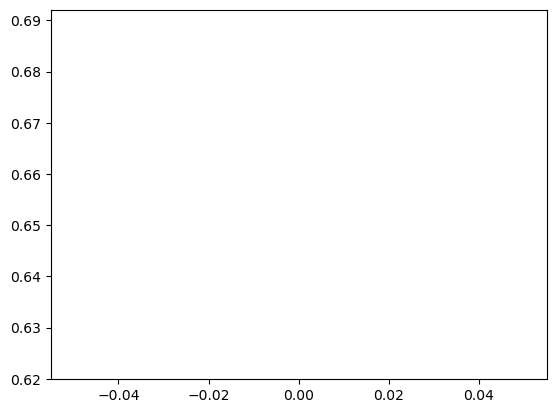

In [23]:
import matplotlib.pyplot as plt
# Plotting the model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()